In [1]:
import os
os.chdir('/home/jagust/dino/surf')
from surf import *
%matplotlib inline

In [48]:
matches = np.load('/home/jagust/dino/surf/matches.npy')
pos_degs, neg_degs = [], []
for match in matches:
    pos_mat, neg_mat = np.load(str(match[0])), np.load(str(match[1]))
    pos_g, neg_g = nx.Graph(pos_mat), nx.Graph(neg_mat)
    add_distance_attr(pos_g)
    add_distance_attr(neg_g)
    pos_degs.append(sum(pos_g.degree(weight='weight').values()))
    neg_degs.append(sum(neg_g.degree(weight='weight').values()))

(-1.9445483900857856, 0.057958589184994073)


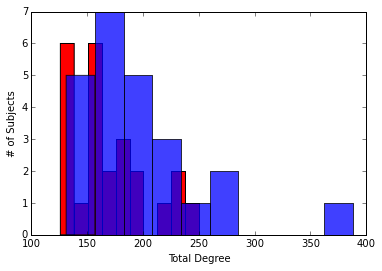

In [69]:
plt.hist(pos_degs, color = 'r')
plt.hist(neg_degs, color = 'b', alpha = 0.75)
plt.xlabel('Total Degree')
plt.ylabel('# of Subjects')
print stats.ttest_ind(pos_degs, neg_degs)
plt.xlim(100, 400)
plt.ylim(0, 7)
plt.savefig('/home/jagust/dino/surf/talk/degree_results.png')

In [50]:
matches = np.load('/home/jagust/dino/surf/matches.npy')
pos_sp, neg_sp = [], []
for match in matches:
    pos_mat, neg_mat = np.load(str(match[0])), np.load(str(match[1]))
    pos_g, neg_g = nx.Graph(pos_mat), nx.Graph(neg_mat)
    add_distance_attr(pos_g)
    add_distance_attr(neg_g)
    pos_sp.append(nx.average_shortest_path_length(pos_g, weight='distance'))
    neg_sp.append(nx.average_shortest_path_length(neg_g, weight='distance'))
    
print stats.ttest_ind(pos_sp, neg_sp)

(1.8314012761237251, 0.073521282226008386)


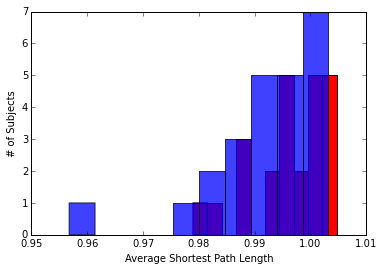

In [65]:
plt.hist(pos_sp, color = 'r', bins = 10)
plt.hist(neg_sp, color = 'b', alpha = 0.75, bins = 10)
plt.xlabel('Average Shortest Path Length')
plt.ylabel('# of Subjects')
plt.ylim(0, 7)
plt.xlim(0.95, 1.01)
plt.savefig('/home/jagust/dino/surf/talk/sp_results.png')

In [44]:
matches = np.load('/home/jagust/dino/surf/matches.npy')
pos_cc, neg_cc = [], []
for match in matches:
    pos_mat, neg_mat = np.load(str(match[0])), np.load(str(match[1]))
#     pos_mat, neg_mat = util.threshold_adjacency_matrix(pos_mat, cost = 0.20)[0], util.threshold_adjacency_matrix(neg_mat, cost = 0.20)[0]
    pos_g, neg_g = nx.Graph(pos_mat), nx.Graph(neg_mat)
    remove_neg_weights(pos_g)
    remove_neg_weights(neg_g)
    add_distance_attr(pos_g)
    add_distance_attr(neg_g)
    pos_cc.append(nx.average_clustering(pos_g, weight='weight'))
    neg_cc.append(nx.average_clustering(neg_g, weight='weight'))
    
print stats.ttest_ind(pos_cc, neg_cc)

(0.023859232007976603, 0.98106809515828119)


In [47]:
matches = np.load('/home/jagust/dino/surf/matches.npy')
pos_mods, neg_mods = [], []
for match in matches:
    pos_mat, neg_mat = np.load(str(match[0])), np.load(str(match[1]))
    pos_mat, neg_mat = util.threshold_adjacency_matrix(pos_mat, cost = 0.20)[0], util.threshold_adjacency_matrix(neg_mat, cost = 0.20)[0]
    pos_g, neg_g = nx.Graph(pos_mat), nx.Graph(neg_mat)
    
    ind = md.newman_partition(pos_g, max_div=np.inf).index
    part = md.GraphPartition(pos_g, index=ind)
    pos_mods.append(part.modularity())

    ind = md.newman_partition(neg_g, max_div=np.inf).index
    part = md.GraphPartition(neg_g, index=ind)
    neg_mods.append(part.modularity())
    
print stats.ttest_ind(pos_mods, neg_mods)

(1.1691357961275066, 0.2483717702617867)
